In [2]:
%matplotlib inline

In [94]:
# dependencies & set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
from IPython.display import display

# data csv includes enrollment totals per school per year
data_filepath = "Resources/output_data/school_directory_enrollment.csv"

# district csv includes enrollment totals per district per year along with percent changes
district_filepath = "Resources/output_data/enrollment_by_dist_changes.csv"

# converting csvs into usable dfs
data_df = pd.read_csv(data_filepath)
district_df = pd.read_csv(district_filepath)

In [196]:
data_df.columns

Index(['Unnamed: 0', 'CDS_CODE', 'SCHOOL', 'School', 'District', 'NCESDist',
       'County', 'Street', 'Zip', 'City', 'State', 'year', 'ENR_TOTAL'],
      dtype='object')

In [199]:
# finding total enrollment by city by year
city_enrollment_groupby = data_df.groupby(by=["City", "year"]).sum()
city_enrollment_groupby = city_enrollment_groupby["ENR_TOTAL"].reset_index()
city_enrollment_groupby

,City,year,ENR_TOTAL
0,Acampo,2015,946
1,Acampo,2016,940
2,Acampo,2017,966
3,Acampo,2018,912
4,Acampo,2019,914
...,...,...,...
4416,Yucca Valley,2015,3885
4417,Yucca Valley,2016,3881
4418,Yucca Valley,2017,3991
4419,Yucca Valley,2018,4025


In [202]:
# finding los angeles changes
is_la = city_enrollment_groupby["City"] == "Los Angeles"

la_df = city_enrollment_groupby.loc[is_la, :]
la_df

,City,year,ENR_TOTAL
2260,Los Angeles,2015,319166
2261,Los Angeles,2016,316190
2262,Los Angeles,2017,309672
2263,Los Angeles,2018,301915
2264,Los Angeles,2019,297399


In [97]:
# finding total enrollment across california per year
cal_enroll_groupby = data_df.groupby(by="year").sum()
cal_enrollment_df = cal_enroll_groupby["ENR_TOTAL"].reset_index()
cal_enrollment_df

,year,ENR_TOTAL
0,2015,5702282
1,2016,5702322
2,2017,5695798
3,2018,5665488
4,2019,5645516


In [99]:
# finding average enrollment across california per year
cal_enroll_mean_groupby = data_df.groupby(by="year").mean()
cal_enroll_mean_df = cal_enroll_mean_groupby["ENR_TOTAL"].reset_index()
cal_enroll_mean_df

,year,ENR_TOTAL
0,2015,631.971850
1,2016,630.997234
2,2017,629.509063
3,2018,623.609026
4,2019,622.919122


In [102]:
# setting standard x axis for all plots using school year
x_axis = ["2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]

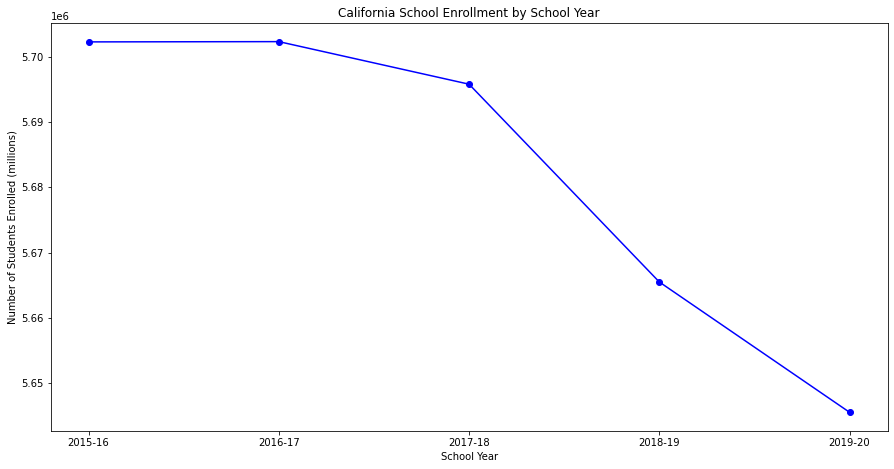

In [181]:
# plotting enrollment trend across all of California 

y_california = cal_enrollment_df["ENR_TOTAL"]

plt.figure(figsize=(15,7.5))
plt.plot(x_axis, y_california, marker="o", color="blue")
plt.title("California School Enrollment by School Year")
plt.xlabel("School Year")
plt.ylabel("Number of Students Enrolled (millions)")

plt.show()

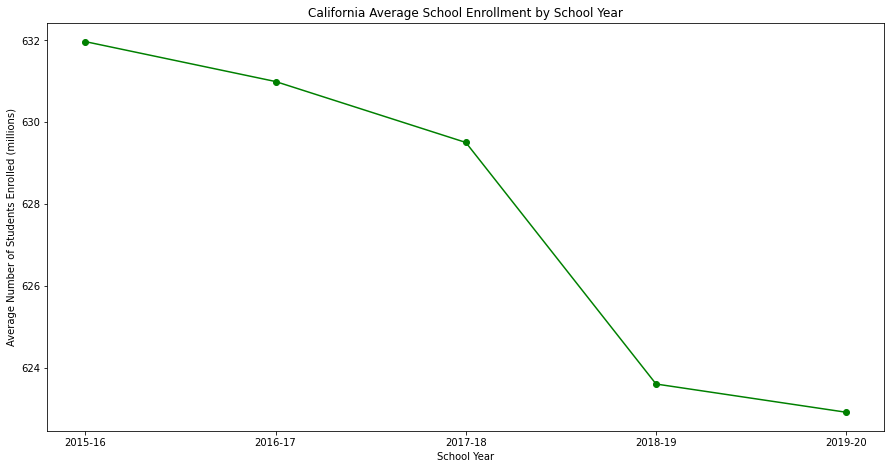

In [192]:
# plotting average enrollment across california
y_cal_mean = cal_enroll_mean_df["ENR_TOTAL"]

plt.figure(figsize=(15,7.5))
plt.plot(x_axis, y_cal_mean, marker="o", color="green")
plt.title("California Average School Enrollment by School Year")
plt.xlabel("School Year")
plt.ylabel("Average Number of Students Enrolled (millions)")

plt.show()

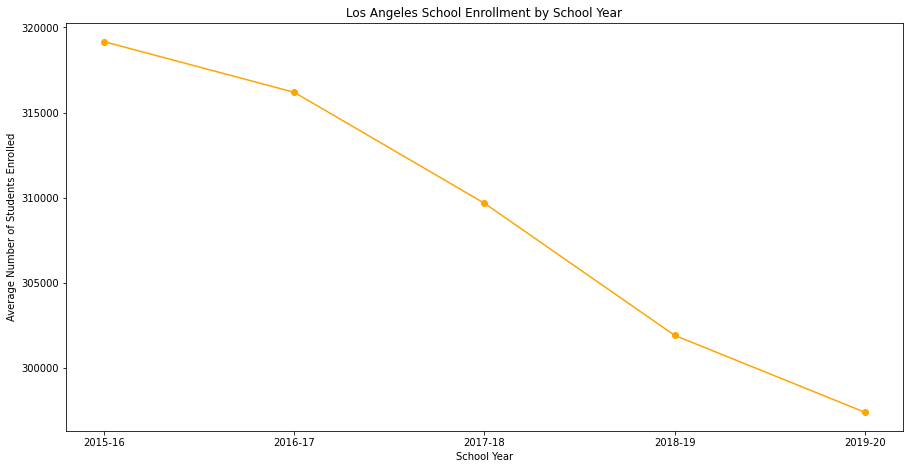

In [206]:
# plotting enrollment change by city
city_y = la_df["ENR_TOTAL"]

plt.figure(figsize=(15,7.5))
plt.plot(x_axis, city_y, marker="o", color="orange")
plt.title("Los Angeles School Enrollment by School Year")
plt.xlabel("School Year")
plt.ylabel("Average Number of Students Enrolled")

plt.show()

In [106]:
# creating dataframe just including Los Angeles Unified School District
is_lausd = district_df["District"] == "Los Angeles Unified"

lausd_df = district_df.loc[is_lausd, :]
lausd_df

,Unnamed: 0,District,year,ENR_TOTAL,Percent Change,NCESDist
2159,4232,Los Angeles Unified,2015,634387,NaN,622710
2160,57837,Los Angeles Unified,2016,628644,-0.905283,622710
2161,125910,Los Angeles Unified,2017,617915,-1.706689,622710
2162,163113,Los Angeles Unified,2018,605310,-2.039925,622710
2163,192534,Los Angeles Unified,2019,594744,-1.745552,622710


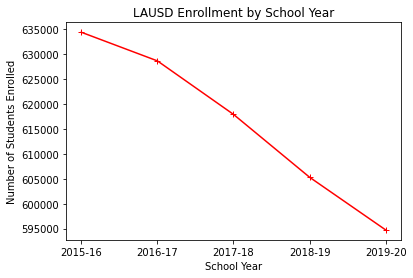

In [184]:
# plotting LAUSD enrollment trends
y_axis = lausd_df["ENR_TOTAL"]

plt.plot(x_axis, y_axis, marker="+", color="red")
plt.title("LAUSD Enrollment by School Year")
plt.xlabel("School Year")
plt.ylabel("Number of Students Enrolled")

plt.show()

In [113]:
# creating list with unique district names
district_list = district_df["District"].unique()

In [189]:
# creating function using arg of District that will pull and show any district enrollment trend

def enrollment_plot(District):
#     for District in district_list:
    loop_dist_df = district_df.loc[district_df["District"] == District, :]
    y_axis = loop_dist_df["ENR_TOTAL"]
    print(f"{District}")
        
    try:
        plt.figure(figsize=(15,7))
        plt.plot(x_axis, y_axis, marker="+", color="red")
        plt.title("Enrollment by School Year")
        plt.xlabel("School Year")
        plt.ylabel("Number of Students Enrolled")
            
        plt.show()
        
        print(loop_dist_df[["District", "ENR_TOTAL", "Percent Change"]])
            
    except:
        print(f"Can't show this plot")

Type in your district:  Los Angeles Unified


Los Angeles Unified


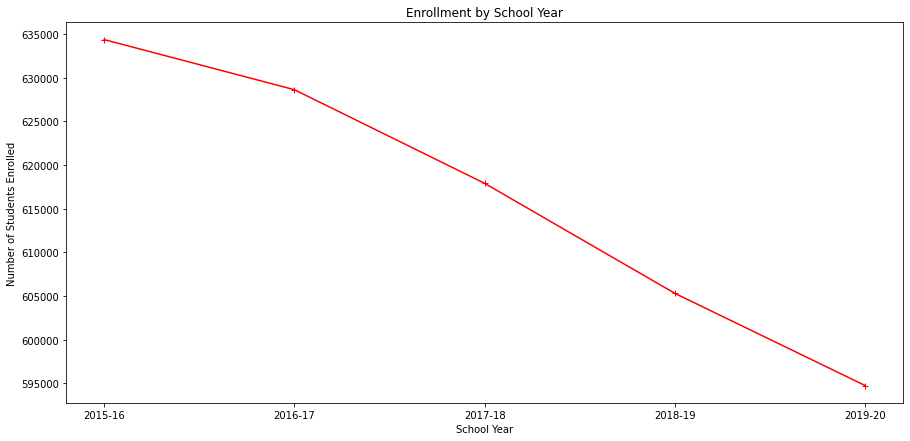

                 District  ENR_TOTAL  Percent Change
2159  Los Angeles Unified     634387             NaN
2160  Los Angeles Unified     628644       -0.905283
2161  Los Angeles Unified     617915       -1.706689
2162  Los Angeles Unified     605310       -2.039925
2163  Los Angeles Unified     594744       -1.745552


In [177]:
# creating an input variable that will go into previous plotting function
district_input = input(f"Type in your district: ")
enrollment_plot(district_input)

In [146]:
# finding average percent change of enrollment by district
average_percent_change = district_df.groupby(by="District").mean().reset_index()

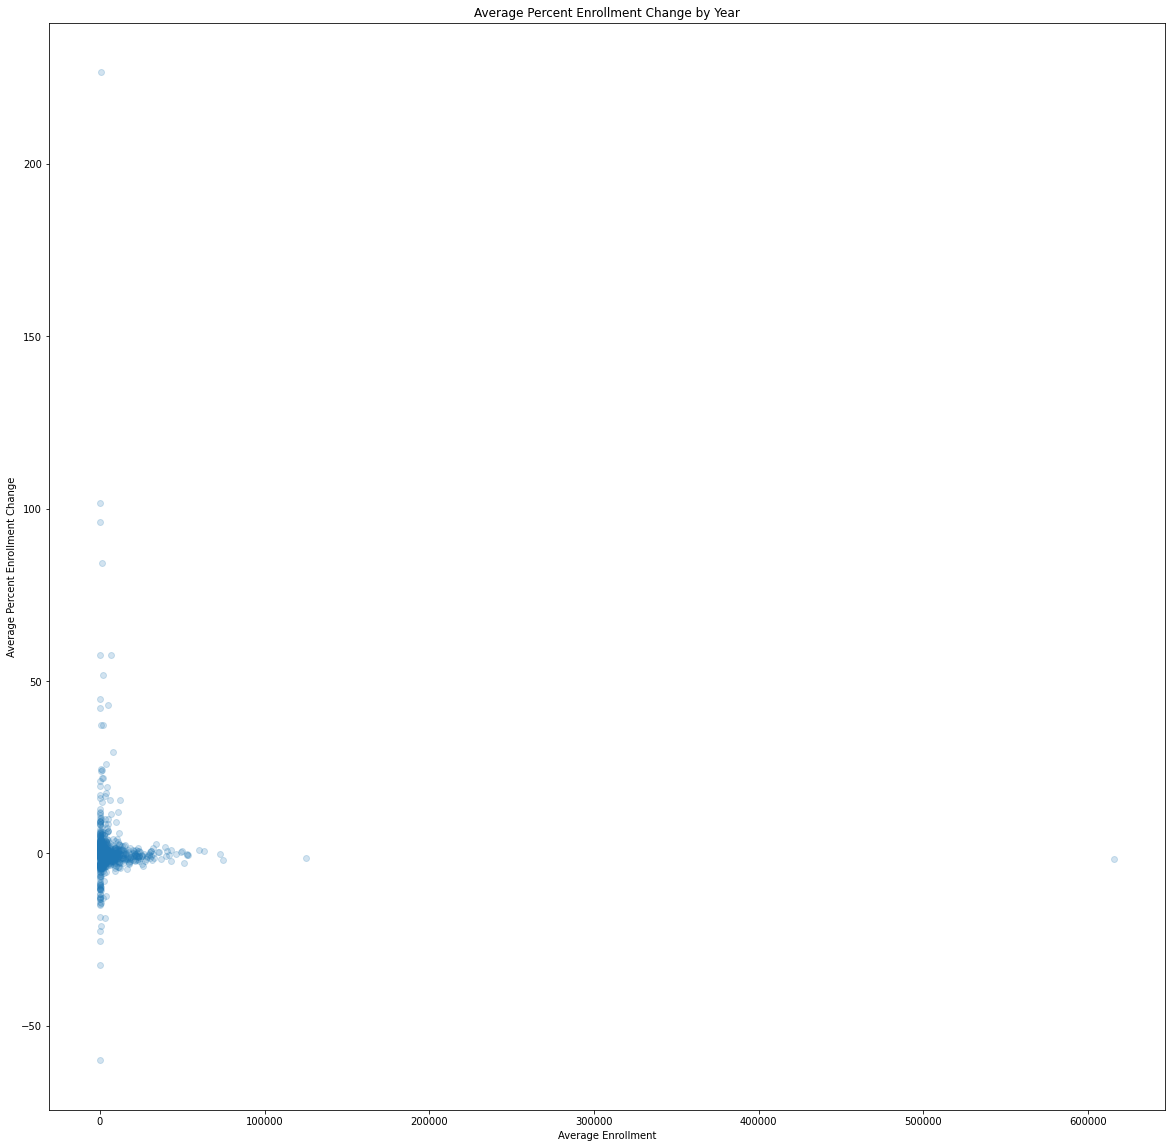

In [183]:
# creating variables for scatter plot
percent_change_y = average_percent_change["Percent Change"]
percent_change_x = average_percent_change["ENR_TOTAL"]

# creating scatter plot based on variables above
plt.figure(figsize=(20,20))
plt.scatter(percent_change_x, percent_change_y, alpha=0.2)
plt.title("Average Percent Enrollment Change by Year")
plt.xlabel("Average Enrollment")
plt.ylabel("Average Percent Enrollment Change")
# plt.figure(figsize=(20,20))

plt.show()

In [146]:
# grouping all districts with negative average enrollment changes
is_negative = average_percent_change["Percent Change"] < 0
negative_df = average_percent_change.loc[is_negative, :]
negative_df

,District,Unnamed: 0,year,ENR_TOTAL,Percent Change,NCESDist
0,ABC Unified,110037.2,2017.0,20529.0,-0.706337,601620.0
4,Adelanto Elementary,112474.8,2017.0,9274.4,-5.121653,601710.0
7,Albany City Unified,112454.4,2017.0,3684.8,-1.619949,601860.0
8,Alexander Valley Union Elementary,114187.2,2017.0,118.2,-2.108101,601890.0
9,Alhambra Unified,116670.8,2017.0,16745.8,-1.573666,600153.0
...,...,...,...,...,...,...
807,Willow Creek Elementary,113753.2,2017.0,36.8,-8.631335,642600.0
808,Willow Grove Union Elementary,113173.0,2017.0,14.6,-7.523316,642630.0
810,Wilsona Elementary,113580.2,2017.0,1276.6,-1.438526,642810.0
813,Woodside Elementary,113445.6,2017.0,400.6,-2.067163,643140.0


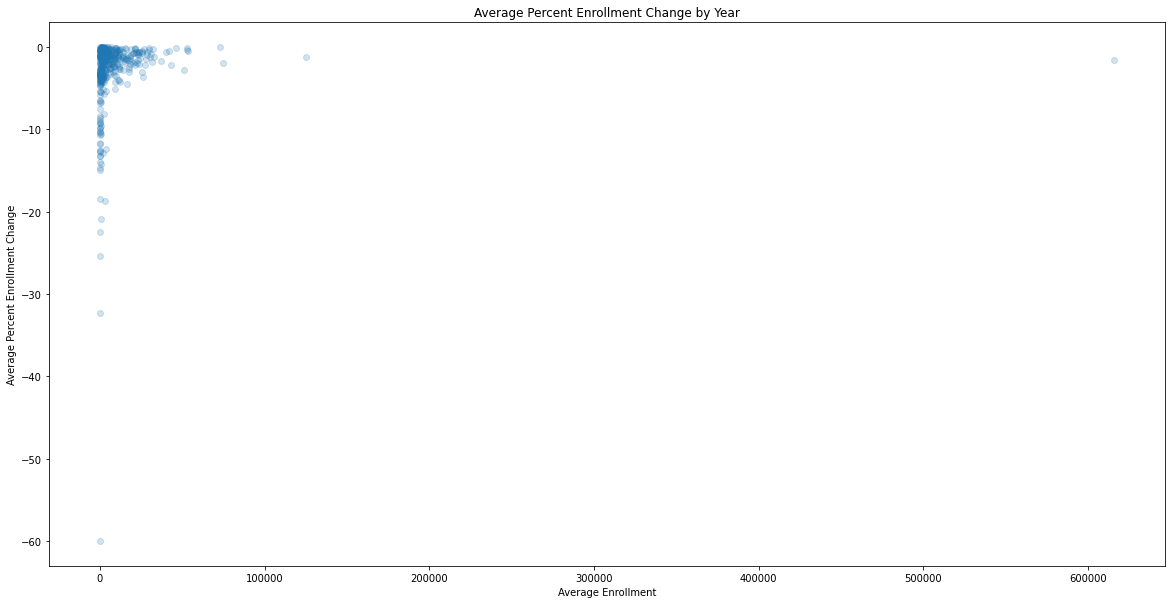

In [171]:
# creating variables for scatter plot
percent_change_ny = negative_df["Percent Change"]
percent_change_nx = negative_df["ENR_TOTAL"]

# creating scatter plot based on variables above
plt.figure(figsize=(20,10))
plt.scatter(percent_change_nx, percent_change_ny, alpha=0.2)
plt.title("Average Percent Enrollment Change by Year")
plt.xlabel("Average Enrollment")
plt.ylabel("Average Percent Enrollment Change")
# plt.figure(figsize=(20,20))

plt.show()

In [151]:
# grouping all districts with positive average enrollment changes
is_positive = average_percent_change["Percent Change"] >= 0
positive_df = average_percent_change.loc[is_positive, :]
positive_df

,District,Unnamed: 0,year,ENR_TOTAL,Percent Change,NCESDist
1,Acalanes Union High,115698.4,2017.0,5587.2,0.385446,601650.0
2,Ackerman Charter,115117.2,2017.0,586.8,1.626061,601680.0
3,Acton-Agua Dulce Unified,114225.2,2017.0,11932.8,15.371619,600001.0
5,Alameda County Office of Education,113953.4,2017.0,3231.6,9.896274,691051.0
6,Alameda Unified,113632.4,2017.0,11195.4,0.412341,601770.0
...,...,...,...,...,...,...
811,Winton,114224.0,2017.0,1957.4,2.320546,642960.0
812,Wiseburn Unified,110078.0,2017.0,4407.4,2.819482,601428.0
814,Yosemite Unified,114207.4,2017.0,2099.6,0.028359,600160.0
815,Yreka Union Elementary,114098.4,2017.0,987.8,1.166598,643380.0


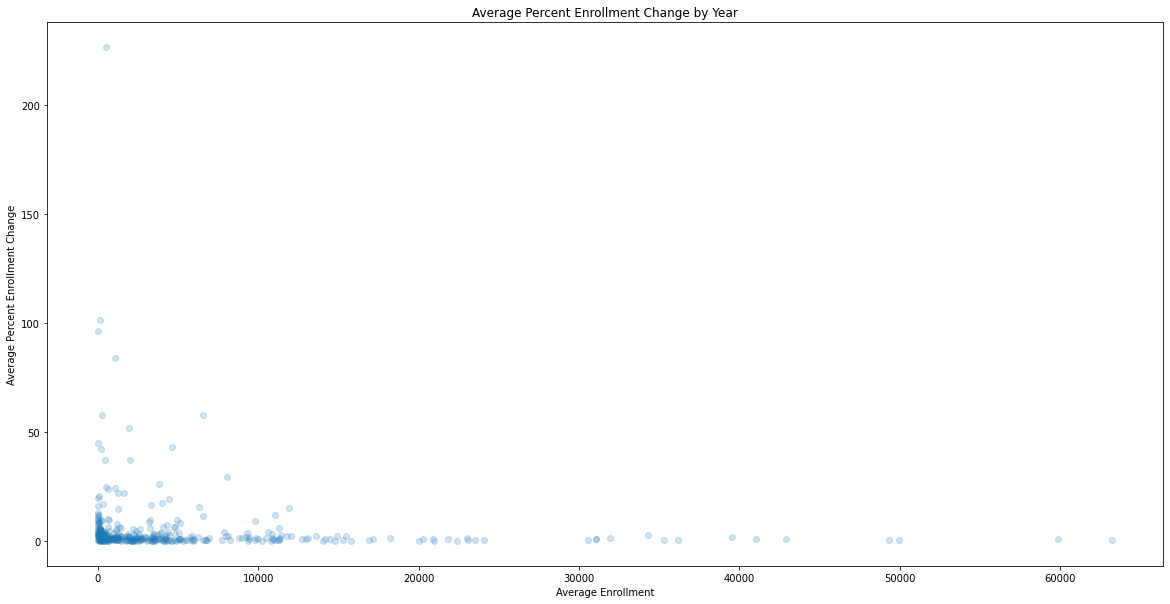

In [173]:
# creating variables for scatter plot
percent_change_py = positive_df["Percent Change"]
percent_change_px = positive_df["ENR_TOTAL"]

# creating scatter plot based on variables above
plt.figure(figsize=(20,10))
plt.scatter(percent_change_px, percent_change_py, alpha=0.2)
plt.title("Average Percent Enrollment Change by Year")
plt.xlabel("Average Enrollment")
plt.ylabel("Average Percent Enrollment Change")

plt.show()